In [39]:
# Import Libraries & Load Dataset

import pandas as pd

df = pd.read_csv("Titanic_Data.csv")

In [40]:
# Head, Info, Describe of Titanic_Data  DataFrame

df.head()
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


np.int64(0)

In [8]:
# Numeric Columns – Histograms

import matplotlib.pyplot as plt
import seaborn as sns

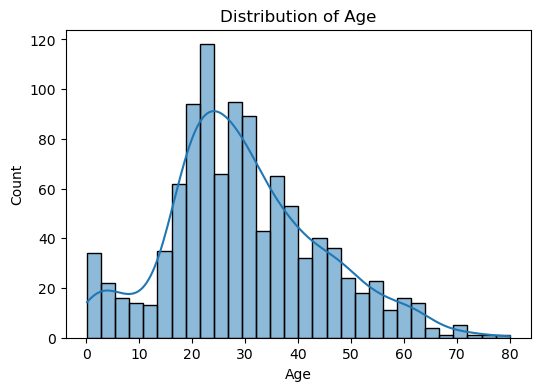

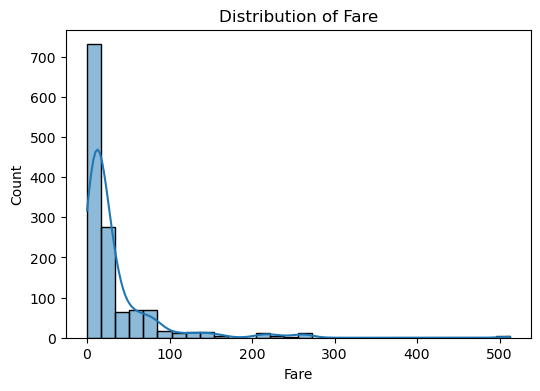

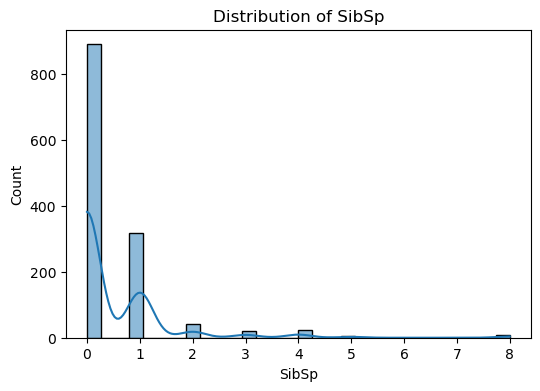

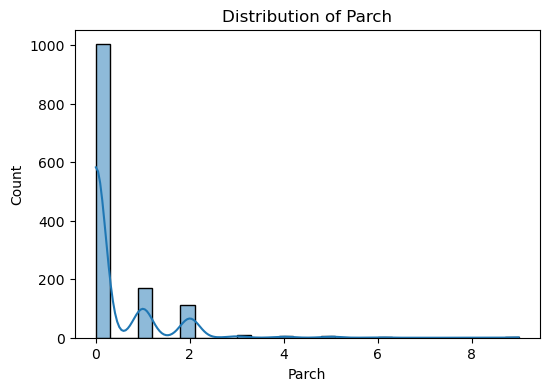

In [10]:
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

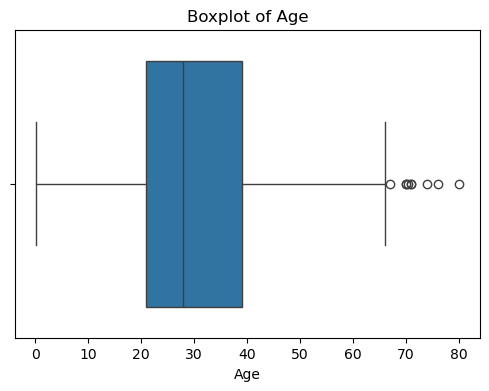

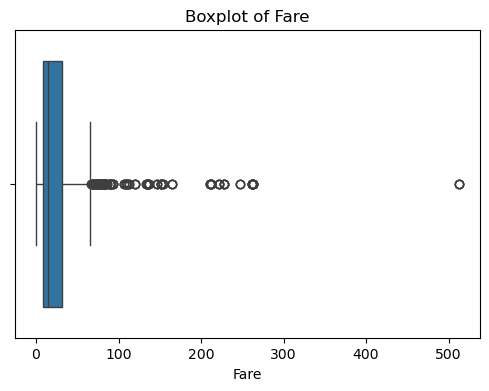

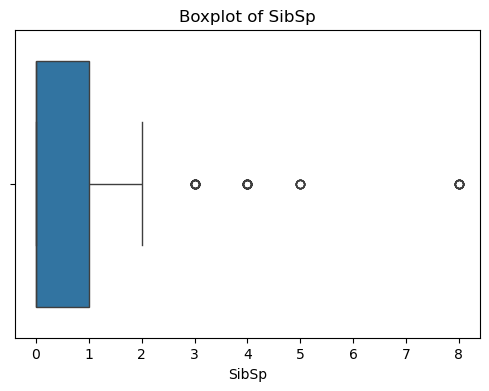

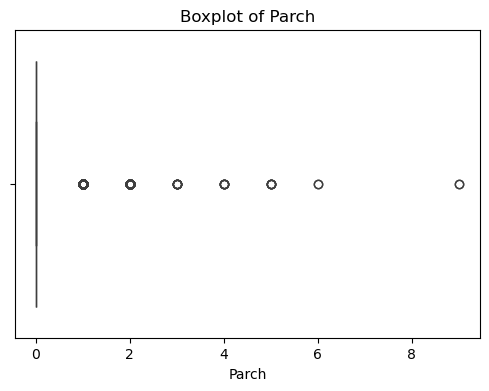

In [17]:
# Numeric Columns – Boxplots (for Outliers)

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

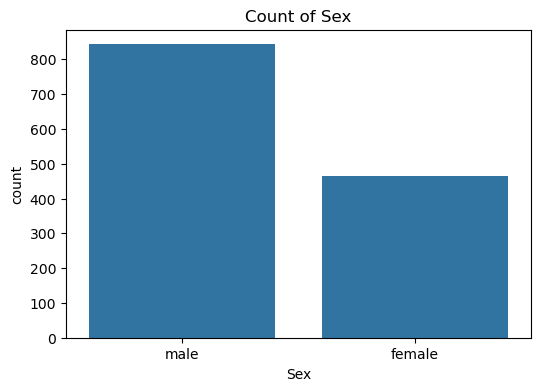

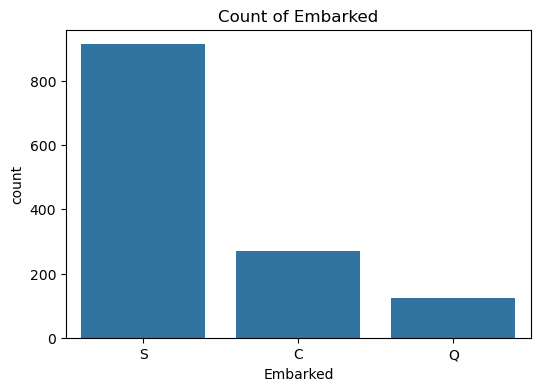

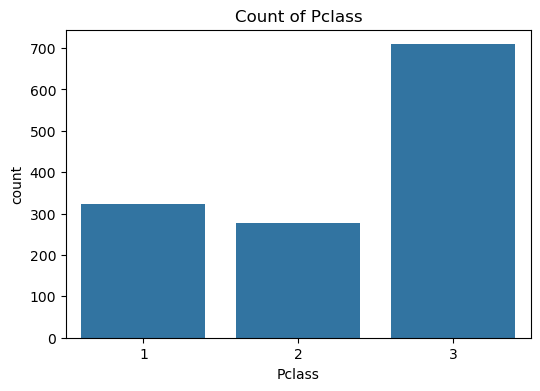

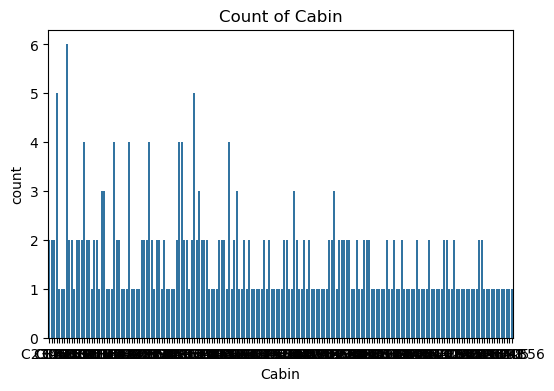

In [20]:
# Categorical Columns – Count Plots

categorical_cols = ['Sex', 'Embarked', 'Pclass', 'Cabin']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.show()

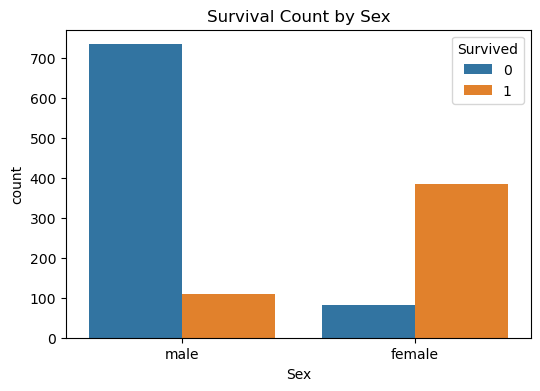

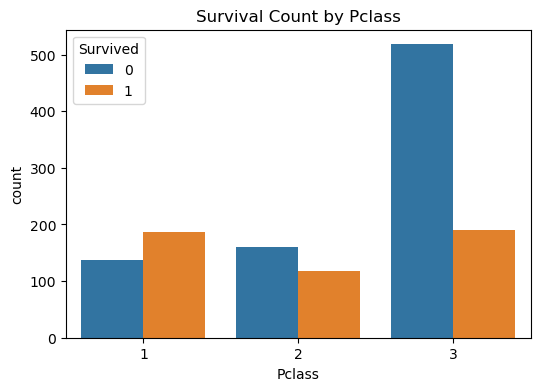

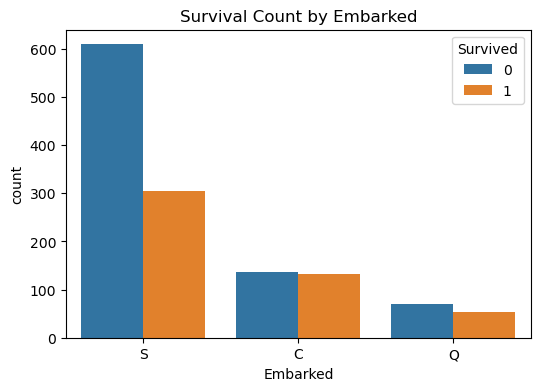

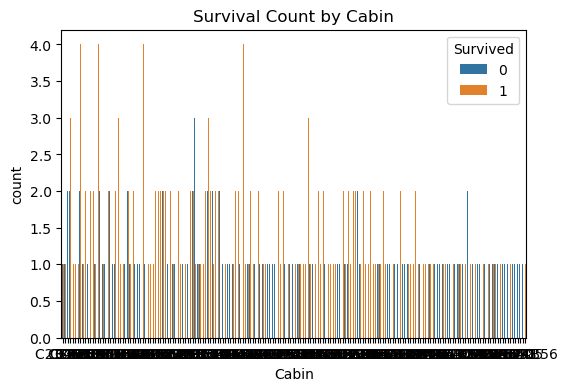

In [22]:
## Bivariate Analysis

#Survived vs Categorical Variables (Count Plots)

categorical_cols = ['Sex', 'Pclass', 'Embarked', 'Cabin']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Survived')
    plt.title(f'Survival Count by {col}')
    plt.show()

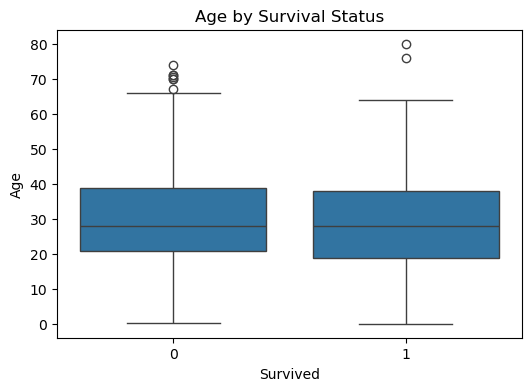

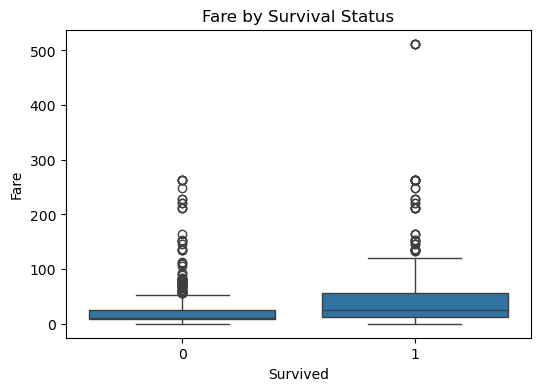

In [25]:
# Survived vs Numerical Variables (Boxplots)

numeric_cols = ['Age', 'Fare']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Survived', y=col)
    plt.title(f'{col} by Survival Status')
    plt.show()

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


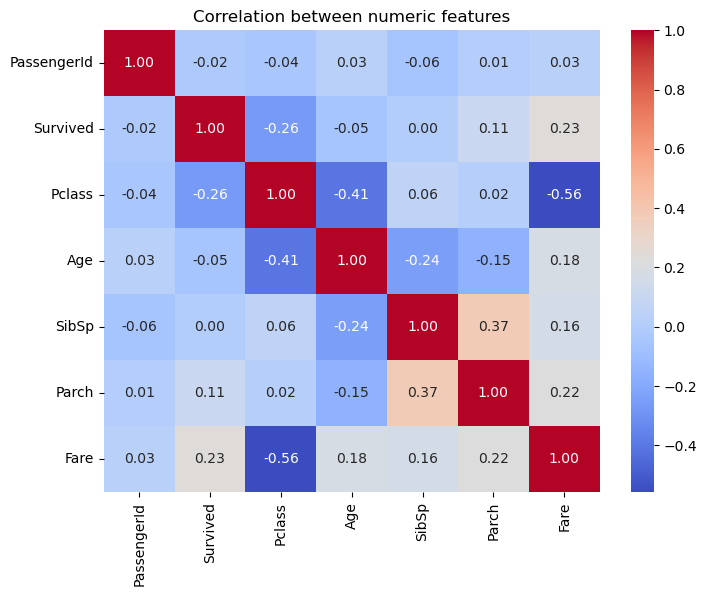

In [26]:
# Correlation Heatmap (Numerical Features)

num_cols = df.select_dtypes(include=['int64', 'float64'])
print(num_cols.columns)
plt.figure(figsize=(8,6))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between numeric features")
plt.show()

In [28]:
df_encoded = df.copy()
df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
df_encoded['Embarked'] = df_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
print(df_encoded.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN       0.0  
1          PC 17599  71.2833   C85       1.0  
2  STON/O2. 3101282   7.9250   NaN       0.0  
3            113803  53.1000  C123       0.0  
4            373450   8.0500   NaN       0.0  


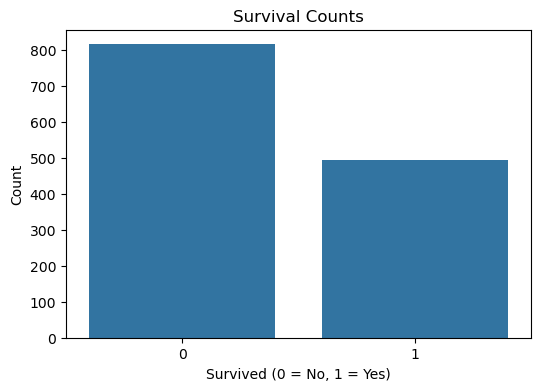

In [32]:
# Encoding Categorical Variables

plt.figure(figsize=(6,4))
sns.countplot(data=df_encoded, x='Survived')
plt.title("Survival Counts")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

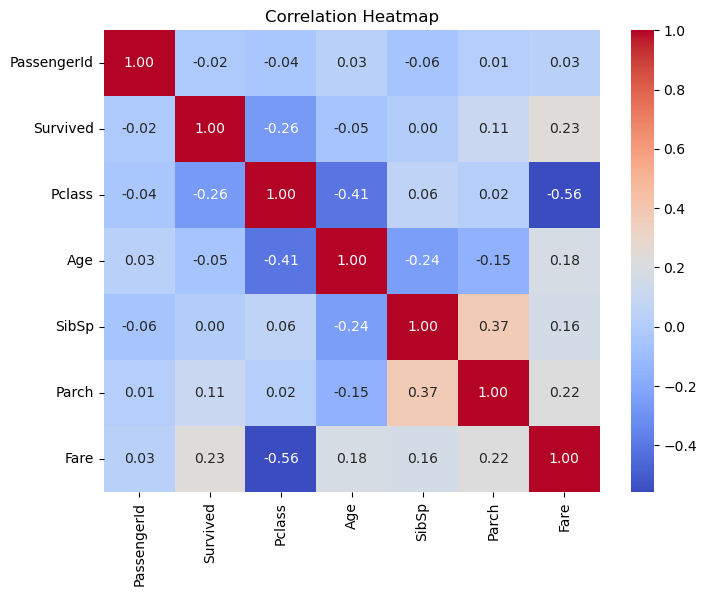

In [34]:
Correlation Heatmap (after encoding)

numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

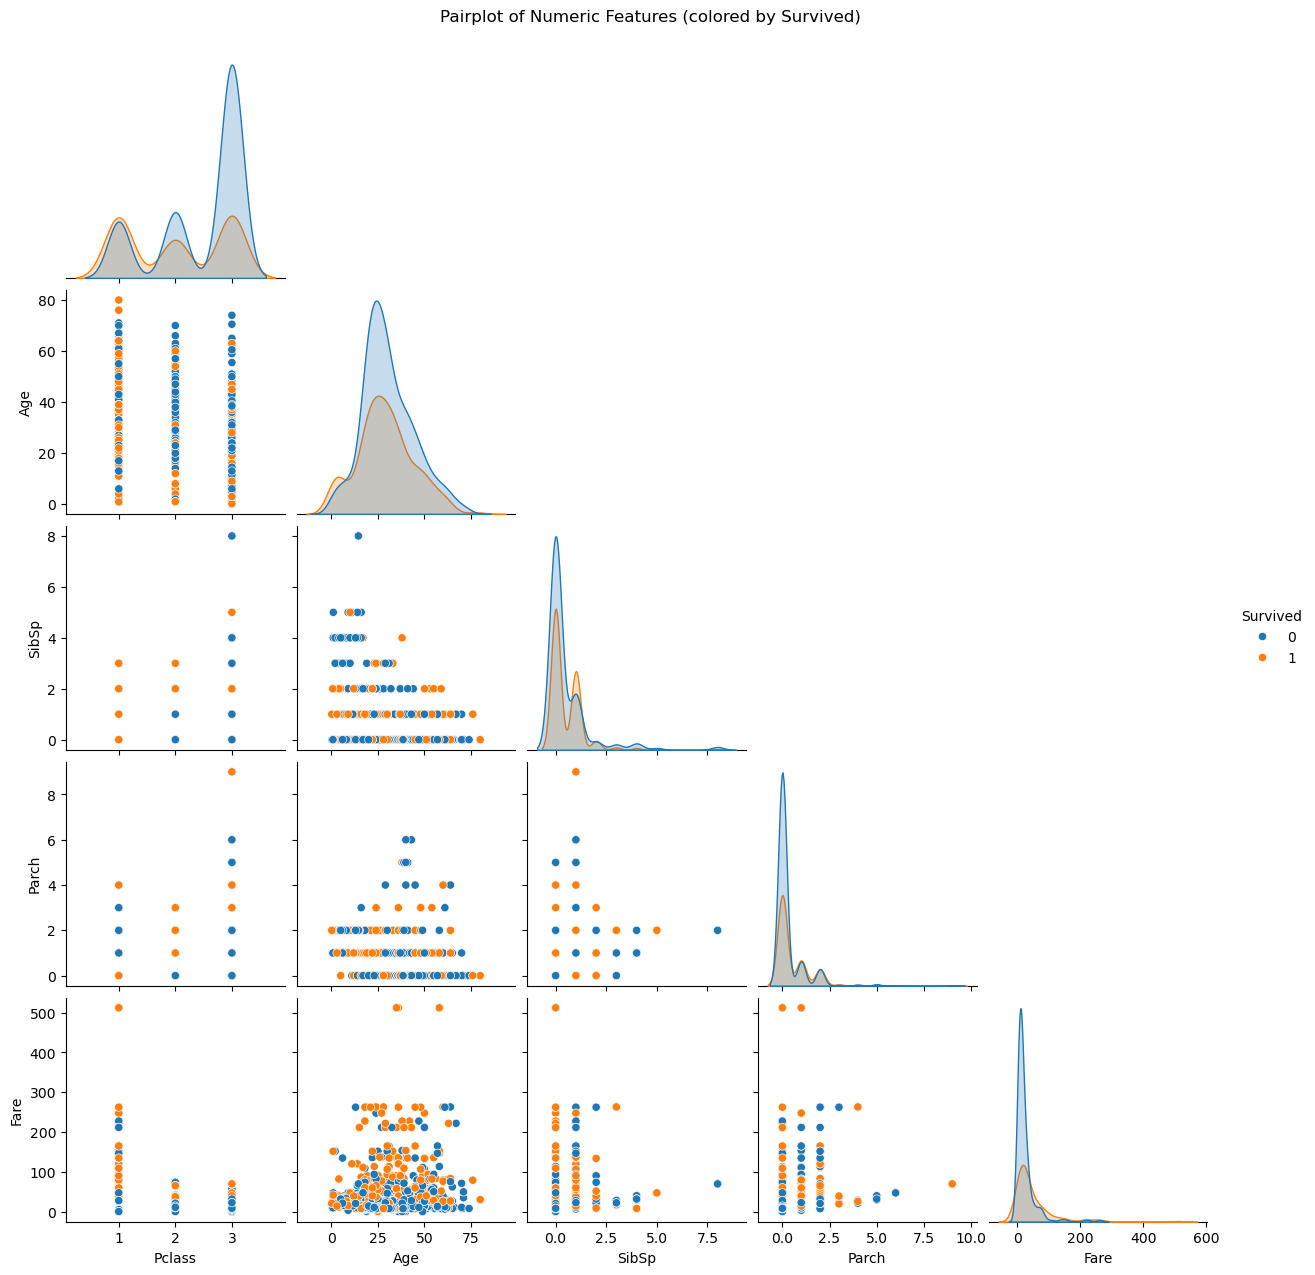

In [37]:
# Pairplot for Relationships and Trends

numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin']
sns.pairplot(df[numeric_cols], hue='Survived', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Numeric Features (colored by Survived)', y=1.02)
plt.show()